# Assignment 3

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Vidya Jayaraman"
STUDENT_ID = "1620208"

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


## Data Exploration and Preprocessing

### Load the Fashion-MNIST dataset
Keras has lots of datsets that you can just load right into python numpy arrays, see: https://keras.io/datasets/

We will be using the Fashion-MNIST dataset, which is a cool little dataset with gray scale $28\times28$ images of articles of clothing.
Keep in mind that they will be downloaded from the internet, so it may take a while.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
# splitting training and test data and corresponding labels 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

In [0]:
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

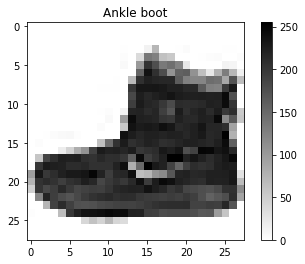

In [153]:
show_image(0)

## Question 1: Data Preprocessing
As you can see above, the images are valued from $[0,255]$. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to $[0,1]$ we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to $[0,1]$ the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between $[-1,1]$, for that you would use a slightly different equation.




### Question 1.1) Normalizing the data
Normalize BOTH the training and testing images using the above equation.

In [0]:
train_images = train_images/255

test_images =  test_images/255


If we show the image again, you will see the values are all scaled correctly.

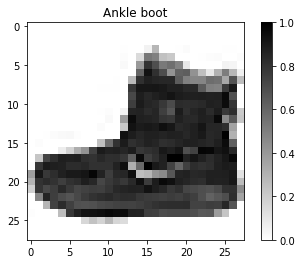

In [155]:
show_image(0)

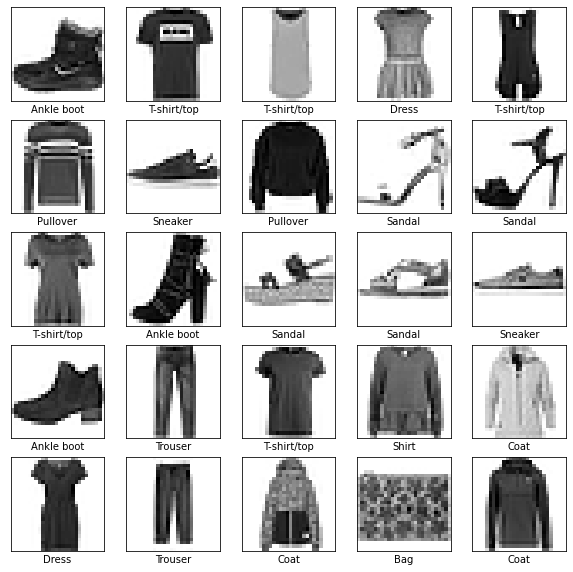

In [156]:
# Lets sample our data to see what kind of images are stored.
# see documentation for subplot here:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Question 1.2) Data visualization
Since our data is composed of grayscale images (one channel) with a resolution of $28\times28$, we can think of this as the images existing in a $28\times28=784$ dimensional space. This means that every single image in our dataset can be represented by a vector of length $784$.

Please reshape BOTH the training and testing images to be $784D$. 

Hint: look into numpy.reshape().


In [157]:
print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')
train_images = np.reshape(train_images, (60000, 784))
test_images = np.reshape(test_images, (10000, 784))
print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')

Before reshape, train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)
Before reshape, train_images shape: (60000, 784) test_images shape: (10000, 784)


We create a dataframe using our training and testing data to keep everything tidy.

In [158]:
# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train["class"] = df_img_train["label"].map(class_dict)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.0,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.0,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3,Dress
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top


In [159]:
# Add test data into a dataframe
img_data = {f"z{i}":test_images[:,i] for i in range(784)}
img_data["label"] = test_labels
df_img_test = pd.DataFrame(img_data)
df_img_test["class"] = df_img_test["label"].map(class_dict)
df_img_test.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.050980,0.262745,0.000000,0.000000,0.000000,0.000000,0.196078,0.149020,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031373,0.470588,0.819608,0.886275,0.968627,...,0.000000,0.000000,0.000000,0.152941,0.976471,1.0,0.482353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192157,0.803922,0.772549,0.043137,0.0,0.015686,0.003922,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,2,Pullover
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.262745,0.694118,0.505882,0.600000,0.458824,0.505882,0.572549,0.552941,0.686275,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,0.768627,1.000000,...,0.988235,0.466667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.384314,0.623529,0.278431,0.000000,0.000000,0.266667,0.690196,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,Trouser
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,0.482353,0.423529,0.388235,0.388235,0.329412,0.325490,0.337255,0.360784,0.274510,0.023529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.415686,0.972549,0.901961,...,0.180392,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078431,0.682353,0.396078,0.000000,0.000000,0.000000,0.572549,0.572549,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,Trouser
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,0.000000,0.223529,0.262745,0.286275,0.298039,0.298039,0.325490,0.243137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.003922,0.003922,0.0,0.000000,0.050980,0.309804,0.501961,0.788235,...,0.772549,0.713725,0.635294,0.239216,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.117647,0.282353,0.372549,0.427451,0.435294,0.435294,0.415686,0.396078,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6,Shirt


Now we have our data reshaped into the $784D$ vectors, using these we can try and visualize the space they live in. However, accurately visualizing high dimensional spaces like these would be practically impossible. We use tools like principle component analysis (PCA), and tSNE to create a projection of this $784D$ space into a more digestible $2D$ or even $3D$.

Don't worry about how they work just yet, we are just using them to visualize our data. Just run the cells to see some cool visuals.

You can direcly use the built in PCA and TSNE models from sklearn, you import them like so:



In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

These tools require our data to be scaled correctly.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
standardized_data = StandardScaler().fit_transform(train_images)

In [0]:
n_comps = 50
pca = PCA(n_components=n_comps)
pca_features = pca.fit_transform(standardized_data)

In [164]:
# Add data into a dataframe
pca_data = {f"z{i}":pca_features[:,i] for i in range(n_comps)}
pca_data["label"] = train_labels
df_pca = pd.DataFrame(pca_data)
df_pca["class"] = df_pca["label"].map(class_dict)
df_pca.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,z40,z41,z42,z43,z44,z45,z46,z47,z48,z49,label,class
0,-0.801175,20.866749,-12.945136,3.311432,-6.638684,1.052827,-0.103101,-5.388831,-3.998838,2.178396,0.635344,2.156503,-2.014092,2.092068,1.566713,0.128545,0.506772,1.234693,1.707595,1.372251,-0.636582,-0.739712,1.142144,0.412034,-2.747417,-2.041938,0.800076,-0.237638,2.226620,-3.822672,0.880678,2.442517,3.066196,-0.112334,-0.161766,-0.706312,-2.139677,-0.636007,1.372493,-0.088391,1.637117,-0.411021,0.992004,2.097440,2.174276,-2.127033,-0.116891,0.108692,-1.710275,-1.362766,9,Ankle boot
1,17.074206,-4.968512,-2.077820,5.895035,11.006847,4.803589,-11.846814,1.595990,-2.131134,-2.342785,0.710330,0.547539,0.945598,-2.220148,-2.886661,2.248241,1.077792,-1.710138,-0.250615,-2.760102,-0.042403,3.228003,3.399300,0.135438,1.622371,1.878778,-0.652887,1.014596,-1.739772,-2.336666,0.604028,0.259071,-1.005205,-2.290209,-1.852390,-0.024767,-4.161215,0.604850,1.372941,1.775669,0.740191,1.958703,-0.041169,-3.262487,-1.592851,-0.751664,2.228333,0.879212,0.716835,0.400663,0,T-shirt/top
2,-9.601641,-12.296101,1.082284,2.580125,0.233065,-0.981053,1.219416,-1.124080,-0.818486,-0.131103,-0.099566,0.542959,0.531615,1.435668,-0.231799,-1.719240,-1.293984,-0.955369,-0.409628,-0.141837,0.198587,0.088567,0.982221,-0.528176,-0.325935,-1.780666,-0.616200,-1.376534,0.829004,0.023311,0.673543,0.357935,0.019213,-0.035551,0.265052,0.466112,-0.577590,-0.214571,-0.278857,0.044075,2.146749,0.171829,-1.412632,0.938696,-0.967207,0.273724,0.933095,0.302353,2.296771,0.594604,0,T-shirt/top
3,-0.311206,-11.576765,3.223877,4.267873,2.366103,0.578038,-2.116618,-0.658573,-0.804144,2.684316,-2.654621,2.896912,-2.221659,3.471278,-3.451932,-2.854985,0.185272,-1.045679,0.066339,0.961169,2.024842,0.982678,2.043498,-0.449360,-0.856015,-1.540938,-1.315999,-2.260731,2.883678,-0.403941,0.352329,0.708260,0.310158,0.071796,0.562653,1.466155,-0.054938,-0.499230,-0.756171,-0.173878,-0.590740,0.841896,-1.007611,0.924667,-1.400738,1.565320,-0.366383,-0.301755,-1.027590,1.226193,3,Dress
4,8.963833,-12.867738,-10.208862,-2.650564,-0.611276,3.657580,3.113013,0.510477,-1.683233,-0.392197,2.691407,2.082374,-1.374484,2.546048,-0.757591,-4.770144,-0.079275,0.953676,-2.602353,-2.325984,1.542962,-0.696683,-1.396608,-0.160077,-1.520484,-2.146697,-1.397518,0.576217,2.525198,-0.394971,0.695761,-0.320160,-0.773779,1.765145,-1.150715,1.831119,-0.015029,0.219034,-0.284588,-2.523760,1.355704,-0.336295,-0.642675,0.483842,0.451933,-0.433555,0.647347,-0.459770,1.260469,0.208315,0,T-shirt/top


In [165]:
print(f'Compressed dimension of {train_images.shape[1]} to {n_comps} maintaining {pca.explained_variance_ratio_.sum()*100:.2f}% of information.')

Compressed dimension of 784 to 50 maintaining 80.06% of information.


In [0]:
model = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200, n_iter=1000)

In [167]:
print('This may take a few minutes...')
# We are only using the first 10000 data points, this is sufficient for this application.
visualization_data = model.fit_transform(pca_features[:10000])
print('Done.')

This may take a few minutes...
Done.


In [168]:
data_to_visualize = {"z1":visualization_data[:,0], "z2":visualization_data[:,1], "label":train_labels[:10000]}
df_visualize = pd.DataFrame(data_to_visualize)
df_visualize["class"] = df_visualize["label"].map(class_dict)
df_visualize.head()

,z1,z2,label,class
0,-6.377758,66.220497,9,Ankle boot
1,-38.736782,-51.487080,0,T-shirt/top
2,-25.460363,-0.196734,0,T-shirt/top
3,-26.230179,-21.901131,3,Dress
4,-56.492916,-5.555086,0,T-shirt/top


### Projecting the classes in 2D for visualization
These images, which started out as $784$ dimensional vectors, are now being projected into a $2D$ space. Don't worry about how tSNE works, it essentially tries to estimate and project distances in a high dimensional space to $2D$. Below we can see a pretty good representation of the space where our data lives.

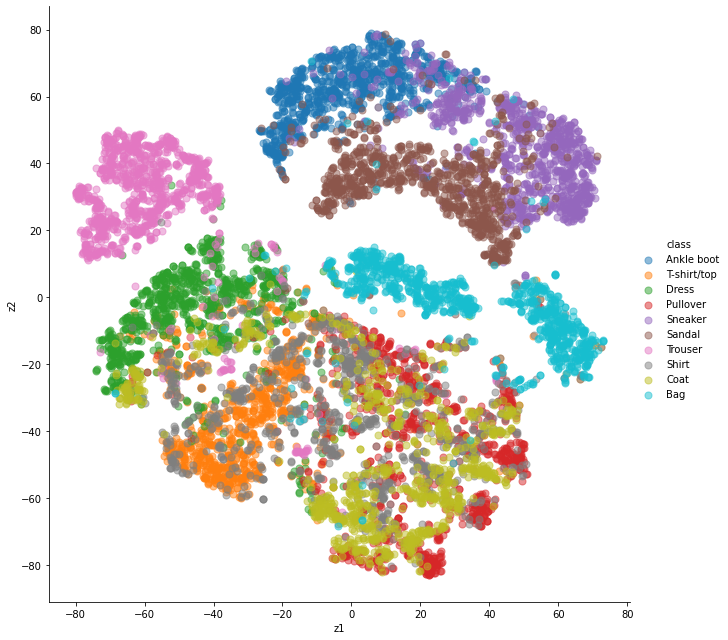

In [169]:
sns.lmplot(x='z1',
           y='z2',
           data=df_visualize, 
           fit_reg=False, 
           hue='class',
           height=9,
           scatter_kws={"s":50,"alpha":0.5})

## Question 2: Linearly Separable
*Some* of the data is easily to separate with a line, this concept is called linear separability. Below we plot only the Ankle Boot and Trouser class. See? It's easy to draw a line between them. This makes sense because it's easy to distinguish between a shoe and pants.


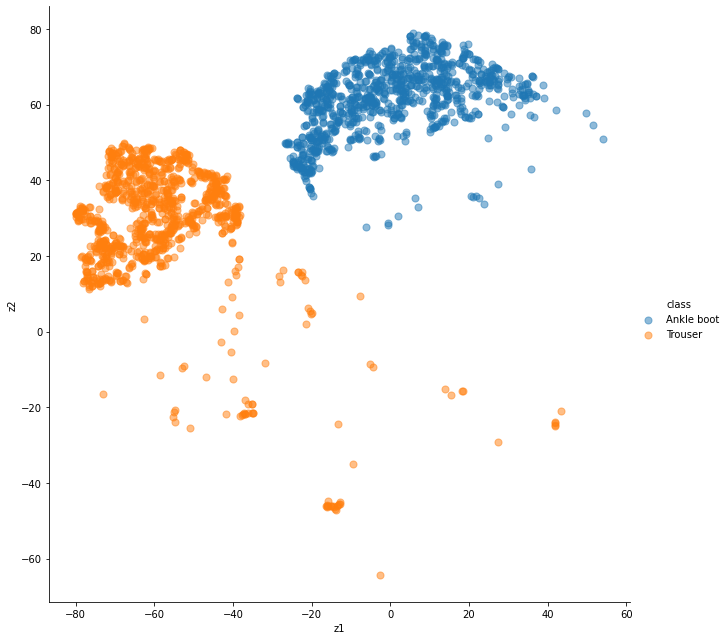

In [170]:
sns.lmplot(x='z1',
           y='z2',
           data=df_visualize[(df_visualize["class"] == "Ankle boot") | (df_visualize["class"] == "Trouser")], 
           fit_reg=False, 
           hue='class',
           height=9,
           scatter_kws={"s":50,"alpha":0.5})

How do you think our logistic regression model will fare at distinguishing Ankle boots from Trousers? Please explain.






Since they are linearly seperable, we can seperate the two possible outputs for the Ankle boots and Trousers, and  the datasets are easier to predict. So the logistic regression model will have better accuracy for predicting Ankle boots from Trousers, since it will be easier for the regression model to accurately get each of the data points.


## Question 3: Not Linearly Separable

Now lets plot something harder to classify, the Pullover and Coat classes which are basically mixed together. You can't easily draw a line between them. This makes sense since a coat and a pullover are pretty similar.

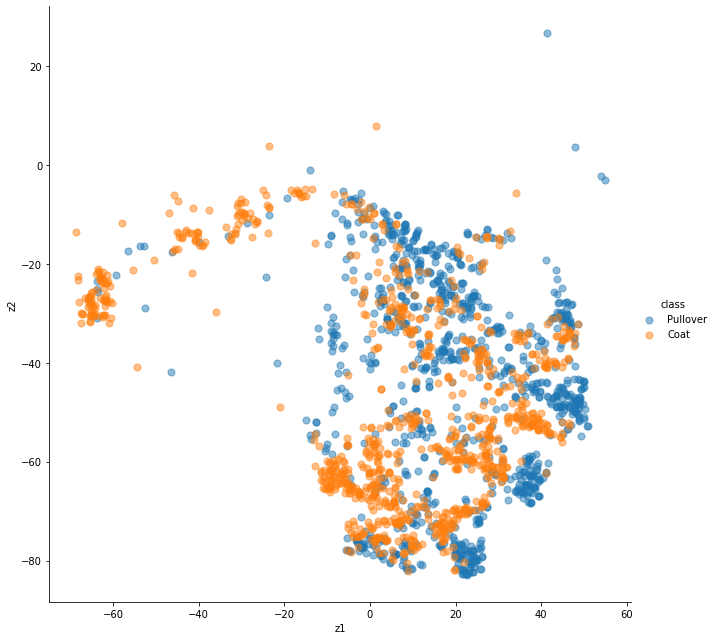

In [171]:
sns.lmplot(x='z1',
           y='z2',
           data=df_visualize[(df_visualize["class"] == "Pullover") | (df_visualize["class"] == "Coat")], 
           fit_reg=False, 
           hue='class',
           height=9,
           scatter_kws={"s":50,"alpha":0.5})

How do you think our logistic regression model will fare at distinguishing Pullovers from Coats? Please explain.


Since they are not linearly seperable, the datapoints for Pullovers and Coats are not able to be seperated easily. So, I think the logistic regression will not do a good job at accurately predicting the datapoints of Pullovers from that of Coats, and the accuracy won't be as good, since the regression model will not have good generalization ability to split data points for Pullovers and Coats. 

## Question 4: Logistic Regression



Recall that each image is $28\times28\times1$ matrix which we flatten to a $784$-dimensional row vector. Image $i$ lookes like:

\begin{equation}
\textbf x_{i} =
\begin{bmatrix}
    x_{1}       & x_{2} & \cdots & x_{784}   
\end{bmatrix}
\tag{1}
\end{equation}


Our dataset $\textbf X$ is then the collection of all these $n$ images.
 
\begin{equation} 
\textbf X =
\begin{bmatrix}
    x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
    \vdots       & \vdots & \ddots & \vdots \\
    x_{n,1}       & x_{n,2} & \cdots & x_{n,784}\\
\end{bmatrix}
\tag{2}
\end{equation}

Recall in lecture that logistic regression uses a bias term, we can easily incorporate this by adding a column of ones at the beginning.

\begin{equation}
\textbf X =
\begin{bmatrix}
    1 & x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    1 & x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
   \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n,1}       & x_{n,2} & \cdots & x_{n,784}
\end{bmatrix}
\tag{3}
\end{equation}

For each image we have a corresponding label $y_i$. This is the class "Coat", "Ankle boot", "Pullover", etc. Each of which is mapped to a unique number.

\begin{equation}
\textbf Y =
\begin{bmatrix}
    y_1  \\
    y_2  \\
    \vdots   \\
    y_{n} 
\end{bmatrix}
\tag{4}
\end{equation}

We will try to find the optimal parameter values $\theta = [\theta_0, \theta_1, \cdots, \theta_{784}]^T$ of our logistic regression model, where $\theta_0$ is the bias weight. To simplify our notation, let
 
\begin{equation}
Z = X \theta =
\begin{bmatrix}
    1 & x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    1 & x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
    \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n,1}       & x_{n,2} & \cdots & x_{n,784}
\end{bmatrix} 
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{784} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + x_{1,1}\theta_1 + \cdots + x_{1,784}\theta_{748}  \\
    \theta_0 + x_{2,1}\theta_1 + \cdots + x_{2,784}\theta_{784}  \\
    \vdots   \\
    \theta_0 + X_{n,1}\theta_1 + \cdots + x_{n,784}\theta_{784}
\end{bmatrix} =
\begin{bmatrix}
    z_1  \\
    z_2  \\
    \vdots   \\
    z_{n}
\end{bmatrix}
\tag{5}
\end{equation}

Since each $z_i$ is in the range $(-\infty, \infty)$ and our labels are $[0,1]$ we pass $z_i$ into the sigmoid function.

\begin{equation}
\sigma(z_i) = \frac{1}{1+e^{-z_i}} = h_i
\tag{6}
\end{equation}


Now we can make predictions using $h_i$ by simply rounding it to 0 or 1.

\begin{equation}
pred_i = round(h_i)
\tag{7}
\end{equation}


In order to train our logistic regression model we need to find the parameter vector $\theta$ that minimizes our cost function $J$, we will be Binary Cross Entropy (BCE). 

\begin{equation}
\text{J} = -\frac{1}{n} \sum_{i=1}^{n} \left [ y_i\log (h_i) + (1-y_i)\log (1-h_i) \right ]
\tag{8} 
\end{equation}

Where $y_i$ is your true label and $h_i = \sigma (z_i)$.



In order to know whether we want to increment or decrement our weights to minimize the loss, we calculate its partial derivative with respect to weights, we call this the gradient, the matrix form of the gradient is:

\begin{equation}
\nabla \text{J} = \frac{1}{n}X^T (H-Y)\tag{9}
\end{equation}

with $X =
\begin{bmatrix}
    1 & x_{1,1}       & x_{1,2} & \cdots & x_{1,784} \\
    1 & x_{2,1}       & x_{2,2} & \cdots & x_{2,784} \\
   \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n,1}       & x_{n,2} & \cdots & x_{n,784}
\end{bmatrix}$,  $ \textbf Y =
\begin{bmatrix}
    y_1  \\
    y_2  \\
    \vdots   \\
    y_{n} 
\end{bmatrix}$, and $ \textbf H =
\begin{bmatrix}
    h_1  \\
    h_2  \\
    \vdots   \\
    h_{n} 
\end{bmatrix}$

We then use this gradient in an iterative algorithm called gradient descent where every iteration we change the wieghts like so:

\begin{equation}
\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla \text{J}
\tag{10}
\end{equation}


Where $t$ is the iteration number, $\alpha$ is your learning rate, $\theta^{(t)}$ is your current weight column vector, and $\theta^{(t+1)}$ is your updated weight column vector.



---



For this question you will implement some of the necessary functions for logistic regression:
 - The BCE loss function
 - The gradient/derivative of the BCE loss function
 - The sigmoid function
 - The predict function
 - The accuracy function

You will also complete the weight update within the gradient descent algorithm.

In [0]:
def get_data_subset(df, classes=[], shuffle=True, shuffle_seed=42):
  if classes == []:
    return None
  else:
    df_filtered = df[(df["class"] == classes[0]) | (df["class"] == classes[1])].copy()
    df_filtered["binary_label"] = 0
    df_filtered.loc[df["class"] == classes[1], "binary_label"] = 1
    data = df_filtered.filter(regex=("z[0-9]+")).values
    labels = df_filtered["binary_label"].values
    if shuffle:
      np.random.seed(shuffle_seed)
      np.random.shuffle(data)
      np.random.seed(shuffle_seed)
      np.random.shuffle(labels)
  
  return data, labels.reshape(-1,1)

In [0]:
def train_test_validation_split(X, y, test_size=.20, validation_size=.20):
    trainIdx = int((1. - test_size - validation_size)*X.shape[0])
    testIdx = int((1. - test_size)*X.shape[0])
    validationIdx = int(1.0 * X.shape[0])
    X_train, y_train = X[:trainIdx], y[:trainIdx]
    X_test, y_test = X[trainIdx:testIdx], y[trainIdx:testIdx]
    X_val, y_val = X[testIdx:validationIdx], y[testIdx:validationIdx]
    return X_train, y_train, X_test, y_test, X_val, y_val

def bias_trick(X):
    return np.hstack((np.ones((X.shape[0],1)), X))

In [0]:
# applying sigmoid function (equation 6) to the vector input of z_i's
def sigmoid(z):  
    sig_z = 1/(1 + np.exp(-z))
    return sig_z

# implementing equation 8    
def binary_cross_entropy(y, h):
  n = len(y)
  # h = sigmoid(z)
  e1 = np.multiply(y, np.log(h))
  e2 = np.multiply((1-y),np.log(1-h))
  return ((-1/n) * np.sum(e1 + e2))
  # sum = (-1/(n)) * np.sum(np.multiplt(y, np.log(h)), )
  # return (np.mean)(e1 + e2)


# returns the derivation of the BCE function based on equation 9
def binary_cross_entropy_derivative(X, y, theta): 
    z = np.dot(X, theta)
    h = sigmoid(z)
    n = len(y)
    der = (1/n)* np.dot((X.T),(h - y))
    
    return der

# returns percentage of correct predictions    
def accuracy(y, h): 
    matches = (y==h)
    return np.mean(matches)
    # YOUR CODE HERE

# returns predictions for all inputs. Given input is h_i based on equations 7.
def predict(h):  
    return np.round(h)
    

def logistic_regression(X, y, learning_rate, num_steps):
   
    # split your data into train and test subsets. Don't forget to apply the bias trick before you split!
    X = bias_trick(X)
    X_train, y_train, X_test, y_test, X_val, y_val = train_test_validation_split(X,y)

    # start with intial parameters theta_i = 0, how many parameters/weights do we need?
    theta = np.zeros((X_train.shape[1]))
  

    
    z = np.dot(X_train,theta)
    h = sigmoid(z)
    print(f'Initial Accuracy:{accuracy(y_train, predict(h)):.4f}')
    val_losses = []
    train_losses = []
    val_accuracies = []
    train_accuracies = []
    
    for step in range(num_steps):
        # Calculate the current output of your logistic network (h_train and h_val)
        z_train = np.dot(X_train, theta)
        h_train = sigmoid(z_train)

        z_val = np.dot(X_val, theta)
        h_val = sigmoid(z_val)

        # Calculate your current training/validation accuracy and BCE loss
        training_accuracy = accuracy(y_train, predict(h_train))
        training_loss = binary_cross_entropy(y_train, h_train)
        validation_accuracy = accuracy(y_val, predict(h_val) )
        validation_loss = binary_cross_entropy(y_val, h_val)

        val_losses.append(validation_loss)
        val_accuracies.append(validation_accuracy)
        train_losses.append(training_loss)
        train_accuracies.append(training_accuracy)
  
        # Calculate the gradient using the derivative of your loss function.
        gradient = binary_cross_entropy_derivative(X_train, y_train, theta)

        
        # Adjust your weights
        theta = theta - (learning_rate * gradient)
        
        print(f'Epoch [{step+1}/{num_steps}] '.ljust(20) + f'loss: {training_loss:.4f} - accuracy: {training_accuracy:.4f} - ', end='')
        print(f"val_loss: {validation_loss:.4f} - val_accuracy: {validation_accuracy:.4f}")
    return theta, train_losses, train_accuracies, val_losses, val_accuracies

Now that we have our logistic implementation complete, let's try and classify Ankle boots against Trousers.

We get the subset of the data containing these classes using the function defined above.

Don't change the learning rate or number of steps.

In [0]:
X, y = get_data_subset(df_img_train, classes=["Trouser", "Ankle boot"])

In [176]:
# train the model until it converges, use the plotted losses below to verify
learning_rate = 0.05
num_steps = 100
theta, train_losses, train_accuracies, val_losses, val_accuracies = logistic_regression(X, y.ravel(), learning_rate, num_steps) 

Initial Accuracy:0.5004
Epoch [1/100]       loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch [2/100]       loss: 0.4047 - accuracy: 0.9917 - val_loss: 0.4044 - val_accuracy: 0.9908
Epoch [3/100]       loss: 0.2816 - accuracy: 0.9956 - val_loss: 0.2812 - val_accuracy: 0.9938
Epoch [4/100]       loss: 0.2171 - accuracy: 0.9960 - val_loss: 0.2167 - val_accuracy: 0.9942
Epoch [5/100]       loss: 0.1778 - accuracy: 0.9961 - val_loss: 0.1775 - val_accuracy: 0.9946
Epoch [6/100]       loss: 0.1515 - accuracy: 0.9962 - val_loss: 0.1511 - val_accuracy: 0.9962
Epoch [7/100]       loss: 0.1325 - accuracy: 0.9962 - val_loss: 0.1322 - val_accuracy: 0.9958
Epoch [8/100]       loss: 0.1182 - accuracy: 0.9962 - val_loss: 0.1179 - val_accuracy: 0.9958
Epoch [9/100]       loss: 0.1071 - accuracy: 0.9964 - val_loss: 0.1067 - val_accuracy: 0.9962
Epoch [10/100]      loss: 0.0981 - accuracy: 0.9964 - val_loss: 0.0977 - val_accuracy: 0.9971
Epoch [11/100]      loss: 0.0907 - a

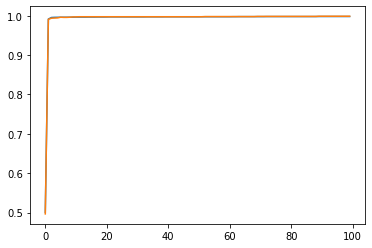

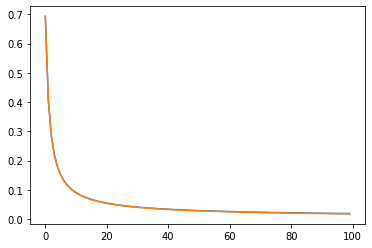

In [177]:
import matplotlib.pyplot as plt
# plot your training accuracy and validation accuracy curves together
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.show()

# plot your training losses and validation losses curves together
plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

### Question 4.1) Observation
What accuracy did it reach? Why do you think it reached this accuracy? How long did it take?




The accuracy it reached was 0.99. Therefore, almost all the points were correctly classified. This is because Ankle boots and Trousers are linearly seperable, so it is easier for the logistic regression to accurately get the data points of each. The initial accuracy was .50 at Epoch 1 and at Epoch 100, the accuracy was 0.99, so it increased in accuracy by double. It took about 8 seconds for it to calculate the accuracy from Epoch 1 to Epoch 50. The loss function has a less steep slope, due to the line reducing error by maximizing the distance between the distance between the samples and the line. 

Now train it to classify Pullover vs. Coat.

In [0]:
X, y = get_data_subset(df_img_train, classes=["Pullover", "Coat"])

In [179]:
# train the model until it converges, use the plotted losses below to verify
# modify learning_rate and num_steps to accomplish this
learning_rate = 0.01
num_steps = 100
theta, train_losses, train_accuracies, val_losses, val_accuracies = logistic_regression(X, y.ravel(), learning_rate, num_steps) 

Initial Accuracy:0.5004
Epoch [1/100]       loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch [2/100]       loss: 0.6895 - accuracy: 0.5128 - val_loss: 0.6896 - val_accuracy: 0.5079
Epoch [3/100]       loss: 0.6861 - accuracy: 0.5594 - val_loss: 0.6863 - val_accuracy: 0.5458
Epoch [4/100]       loss: 0.6828 - accuracy: 0.6276 - val_loss: 0.6830 - val_accuracy: 0.6133
Epoch [5/100]       loss: 0.6796 - accuracy: 0.6819 - val_loss: 0.6799 - val_accuracy: 0.6742
Epoch [6/100]       loss: 0.6765 - accuracy: 0.7101 - val_loss: 0.6768 - val_accuracy: 0.7013
Epoch [7/100]       loss: 0.6735 - accuracy: 0.7279 - val_loss: 0.6738 - val_accuracy: 0.7154
Epoch [8/100]       loss: 0.6705 - accuracy: 0.7350 - val_loss: 0.6709 - val_accuracy: 0.7246
Epoch [9/100]       loss: 0.6677 - accuracy: 0.7408 - val_loss: 0.6680 - val_accuracy: 0.7304
Epoch [10/100]      loss: 0.6649 - accuracy: 0.7439 - val_loss: 0.6653 - val_accuracy: 0.7321
Epoch [11/100]      loss: 0.6621 - a

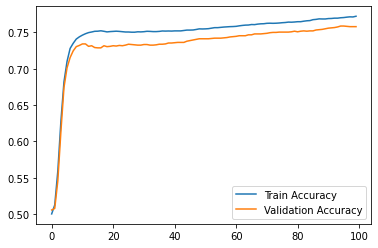

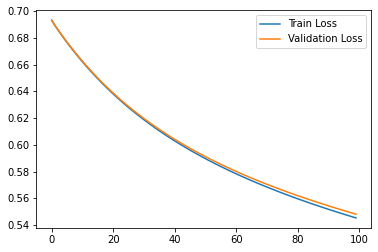

In [180]:
import matplotlib.pyplot as plt
# plot your training accuracy and validation accuracy curves together
plt.plot(train_accuracies, label = 'Train Accuracy')
plt.plot(val_accuracies,label='Validation Accuracy')
plt.legend()
plt.show()

# plot your training losses and validation losses curves together
plt.plot(train_losses, label = 'Train Loss')
plt.plot(val_losses, label = 'Validation Loss')
plt.legend()
plt.show()

### Question 4.2) Observation
What accuracy did it reach? Why do you think it reached this accuracy? How long did it take?
 


The accuracy it reached was .77. Since it is not linearly seperable, it is harder for logistic regression to get accurate data points for Ankle boots and Trousers. It also started at 0.50 at Epoch 1, and at Epoch 100, the accuracy was 0.77. Moreover, the loss only went from 0.69 to 0.54. It took about 8 seconds.

## Question 4.3) Comparison
Compare and contrast both runs above, are they the same? Different? Then explain why this is the case.

Pullover and Coats does not have good of an accuracy as Ankle Boots and Trousers, since it is not linearly seperable, so it is hard for the logistic regression to get accurate data points for each. Meanwhile, Trousers and Ankle boots are linearly seperable, soit was easier for the logistic regression to accurately get each of its datapoints. The accuracy for Pullover and Coat only went up 54%, while the accuracy for Trousers and Ankle boots went up by 99%, almost double that of Pullover and Coats'. Moreoever, the loss, which is not rounded, has a bigger difference between the two runs. The Pullover and Coat's loss only went from 0.69 to 0.54, while the Ankle Boots went from 0.69 to 0.019, a much bigger difference  

## Question 5: Neural Networks


In this question we will build a neural network with Keras that can beat our logistic regression model at classifying Pullovers vs. Coats.

In [0]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer

# Define an input layer with the correct shape for your data
input_layer = Input(shape=(784,))

# Pass the input layer's output to a dense of size 100, choose whatever activation you think is suitable
x = Dense(100, activation='tanh')(input_layer)

# Pass the previouses hidden layer's output to a dense of size 1 for classification, what activation do we need to use?
output = Dense(1, activation='sigmoid')(x)

# Define a model with it's input as your input layer and output as your output layer
model = Model(input_layer, output)

In [182]:
# Show a summary of your model
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile your model with your chosen optimizer, binary cross entropy for the loss, and accuracy as the metric

sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
# want to compile neural network, define loss function
model.compile(loss='binary_crossentropy',
              # gradient descent optimizer
              optimizer=sgd,
              # one of the evaluation metrics is accuracy
              metrics='accuracy')

In [184]:
X, y = get_data_subset(df_img_train, classes=["Pullover", "Coat"])

# Call fit on your model passing in the X, y data above with validation split of 0.2 and train for 100 epochs
hist = model.fit(X,
                    y, 
                    # runs model for 150 iterations 
                    # each 10 iterations, prints decision boundary
                    epochs=150, 
                    # optimize model for 128 inputs,instead of original 300+
                    batch_size=128, 
                    validation_split=0.2)

Epoch 1/150
75/75 [==============================] - 0s 5ms/step - loss: 0.4296 - accuracy: 0.7994 - val_loss: 0.3487 - val_accuracy: 0.8554
Epoch 2/150
75/75 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8604 - val_loss: 0.3184 - val_accuracy: 0.8821
Epoch 3/150
75/75 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8696 - val_loss: 0.3055 - val_accuracy: 0.8796
Epoch 4/150
75/75 [==============================] - 0s 4ms/step - loss: 0.3103 - accuracy: 0.8704 - val_loss: 0.3323 - val_accuracy: 0.8683
Epoch 5/150
75/75 [==============================] - 0s 4ms/step - loss: 0.2853 - accuracy: 0.8845 - val_loss: 0.2901 - val_accuracy: 0.8858
Epoch 6/150
75/75 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8885 - val_loss: 0.2818 - val_accuracy: 0.8842
Epoch 7/150
75/75 [==============================] - 0s 4ms/step - loss: 0.2774 - accuracy: 0.8864 - val_loss: 0.2860 - val_accuracy: 0.8808
Epoch 8/150
7

In [0]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

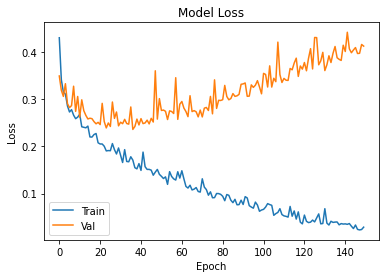

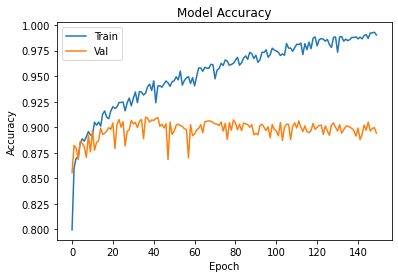

In [187]:
# plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

## Question 5.1) Observation
How did your neural network perform? What hyperparameters and optimizer did you choose to beat logistic regression? Why do you think your neural network beat your logistic regression model?

The accuracy is 0.99 for the neural network, while the 
accuracy for the logistic model is only 75, for Epoch 100. Therefore, the neural network beat the logistic regression model. The hyperparamters I chose were 0.5 for the learning rate, which allowed the loss to decay. I made the epochs 150, since the validation accuracy for last couple Epochs decreased from the previous Epochs, but the accuracy is still increasing. By increasing the Epochs beyond this point, we get overfitting. The activation function for the input layer was 'tanh' and the activation I chose for the output layer was 'sigmoid'. This gave me a lower loss, which was .02, rather than 0.54. We want to focus on classification, and classify based on a probability, in the output layer, which is why I used 'sigmoid'. For the input layer, I could have used 'softmax' instead of 'tanh' too, since they both gave low losses. But 'tanh' gave me lower losses. The optimizer I used was stochastic gradient descent, which allows more randomization and fluctuation, which enables it to jump to new and potentially better local minima faster. 
